In [2]:
import pandas as pd

def ler_arquivo_dat(nome_arquivo):
    with open(nome_arquivo, "r") as arquivo:
        conteudo = arquivo.readlines()  # Lê todas as linhas do arquivo
        
        # Encontra a primeira linha contendo START_VARIABLE = nome_variavel
        var = ""
        for linha in conteudo:
            if "START_VARIABLE" in linha:
                var = linha.split("=")[1].strip()
                break  # Sai do loop quando encontrar a linha desejada
        
        # Procura por linhas começando com SIZES = e adiciona as variáveis ao array
        variaveis = []
        for linha in conteudo:
            if "SIZES" in linha:
                quantidade = int(linha.split("=")[1])
                for i in range(1, quantidade + 1):
                    variaveis.append(f"{var}{i}")
            elif "START_VARIABLE" in linha:
                var = linha.split("=")[1].strip()
            if "EOF" in linha:
                break  # Sai do loop quando encontrar EOF
        
        # Cria um dataframe pandas a partir das linhas restantes do arquivo
        dados = [linha.strip().split(",") for linha in conteudo if len(linha.strip().split(",")) == 11]
        df = pd.DataFrame(dados, columns=variaveis)
        return df

# Chamada da função para ler o arquivo .dat e criar o dataframe
#df = ler_arquivo_dat("utils/C1_CP_FGM_FULL/data.dat")


In [3]:
for col in ['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL2', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3','B_vec_xyz_gse__C1_CP_FGM_FULL1', 'B_vec_xyz_gse__C1_CP_FGM_FULL2', 'B_vec_xyz_gse__C1_CP_FGM_FULL3']:
    df[col] = df[col].astype(float)

NameError: name 'df' is not defined

In [4]:
import numpy as np
import pandas as pd

# Carregar os datasets
data_1 = ler_arquivo_dat("utils/C1_CP_FGM_FULL/data.dat")
data_2 = ler_arquivo_dat("utils/C2_CP_FGM_FULL/C2_CP_FGM_FULL__20010213_104200_20010213_105000_V140306.cef")
data_3 = ler_arquivo_dat("utils/C3_CP_FGM_FULL/C3_CP_FGM_FULL__20010213_104200_20010213_105000_V140305.cef")
data_4 = ler_arquivo_dat("utils/C4_CP_FGM_FULL/C4_CP_FGM_FULL__20010213_104200_20010213_105000_V140305.cef")

# Extrair valores relevantes dos datasets


In [5]:
data_2.columns = data_1.columns
data_3.columns = data_1.columns
data_4.columns = data_1.columns


In [6]:
for col in data_1.columns:
    try:
        data_1[col] = data_1[col].astype(float)
        data_2[col] = data_2[col].astype(float)
        data_3[col] = data_3[col].astype(float)
        data_4[col] = data_4[col].astype(float)
    except:
        pass

In [7]:
data_1 = data_1[:len(data_2)]
data_1

,time_tags__C1_CP_FGM_FULL1,half_interval__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL2,B_vec_xyz_gse__C1_CP_FGM_FULL3,B_mag__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL2,sc_pos_xyz_gse__C1_CP_FGM_FULL3,range__C1_CP_FGM_FULL1,tm__C1_CP_FGM_FULL1
0,2001-02-13T10:42:00.015Z,0.02231,5.113,-7.599,-1.399,9.265,99738.7,14388.7,-29831.2,2.0,22 $
1,2001-02-13T10:42:00.060Z,0.02231,5.090,-7.587,-1.362,9.237,99738.6,14388.7,-29831.3,2.0,22 $
2,2001-02-13T10:42:00.104Z,0.02231,5.107,-7.577,-1.387,9.242,99738.6,14388.7,-29831.3,2.0,22 $
3,2001-02-13T10:42:00.149Z,0.02231,5.094,-7.576,-1.385,9.234,99738.5,14388.6,-29831.4,2.0,22 $
4,2001-02-13T10:42:00.193Z,0.02231,5.060,-7.551,-1.382,9.195,99738.5,14388.6,-29831.4,2.0,22 $
...,...,...,...,...,...,...,...,...,...,...,...
10757,2001-02-13T10:49:59.777Z,0.02231,-2.179,7.030,-1.407,7.493,99217.6,14068.4,-30233.0,2.0,22 $
10758,2001-02-13T10:49:59.822Z,0.02231,-2.200,7.041,-1.339,7.497,99217.6,14068.4,-30233.0,2.0,22 $
10759,2001-02-13T10:49:59.867Z,0.02231,-2.185,7.024,-1.282,7.467,99217.5,14068.4,-30233.1,2.0,22 $
10760,2001-02-13T10:49:59.911Z,0.02231,-2.139,7.011,-1.301,7.444,99217.5,14068.3,-30233.1,2.0,22 $


In [9]:
data_1.head()

,time_tags__C1_CP_FGM_FULL1,half_interval__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL2,B_vec_xyz_gse__C1_CP_FGM_FULL3,B_mag__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL2,sc_pos_xyz_gse__C1_CP_FGM_FULL3,range__C1_CP_FGM_FULL1,tm__C1_CP_FGM_FULL1
0,2001-02-13T10:42:00.015Z,0.02231,5.113,-7.599,-1.399,9.265,99738.7,14388.7,-29831.2,2.0,22 $
1,2001-02-13T10:42:00.060Z,0.02231,5.090,-7.587,-1.362,9.237,99738.6,14388.7,-29831.3,2.0,22 $
2,2001-02-13T10:42:00.104Z,0.02231,5.107,-7.577,-1.387,9.242,99738.6,14388.7,-29831.3,2.0,22 $
3,2001-02-13T10:42:00.149Z,0.02231,5.094,-7.576,-1.385,9.234,99738.5,14388.6,-29831.4,2.0,22 $
4,2001-02-13T10:42:00.193Z,0.02231,5.060,-7.551,-1.382,9.195,99738.5,14388.6,-29831.4,2.0,22 $


In [18]:
import numpy as np
import pandas as pd

mu_0 = 1.25663706212e-6  # Permeability of Free Space (H/m)

def calculate_B_diff(df1, df2):
    '''
    Calculate the magnetic field difference between two satellites.
    '''
    B_diff = df1[['B_vec_xyz_gse__C1_CP_FGM_FULL1','B_vec_xyz_gse__C1_CP_FGM_FULL2', 'B_vec_xyz_gse__C1_CP_FGM_FULL3']].values - df2[['B_vec_xyz_gse__C1_CP_FGM_FULL1','B_vec_xyz_gse__C1_CP_FGM_FULL2', 'B_vec_xyz_gse__C1_CP_FGM_FULL3']].values
    return B_diff

def calculate_r_diff(df1, df2):
    '''
    Calculate the distance between two satellites.
    '''
    r_diff = df1[['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL2', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3']].values - df2[['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL2', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3']].values
    return r_diff

def calculate_current_density(df1, df2, df3):
    '''
    Calculate the total current density using equation (2)
    '''
    r12 = calculate_r_diff(df1, df2)
    r13 = calculate_r_diff(df1, df3)
    r23 = calculate_r_diff(df2, df3)

    B12 = calculate_B_diff(df1, df2)
    B13 = calculate_B_diff(df1, df3)
    B23 = calculate_B_diff(df2, df3)
    
    temp = pd.DataFrame()
    temp['r13'] = r13.tolist()
    temp['r23'] = r23.tolist()
    temp['B13'] = B13.tolist()
    temp['B23'] = B23.tolist()

    Jijk = temp.apply(lambda row: (1/mu_0) * ((np.dot(row['B13'], row['r23']) - np.dot(row['B23'], row['r13']))/ np.dot(np.cross(row['r13'], row['r23']), np.cross(row['r13'], row['r23']))), axis=1)

    return Jijk
def curlometer(spacecraft1, spacecraft2, spacecraft3, spacecraft4):
    '''
    Calculate the curlometer current density using equation (2)
    '''
    J123 = calculate_current_density(spacecraft1, spacecraft2, spacecraft3)
    J124 = calculate_current_density(spacecraft1, spacecraft2, spacecraft4)
    J134 = calculate_current_density(spacecraft1, spacecraft3, spacecraft4)
    J234 = calculate_current_density(spacecraft2, spacecraft3, spacecraft4)
    return np.mean(J123 + J124 + J134 + J234, axis=0)


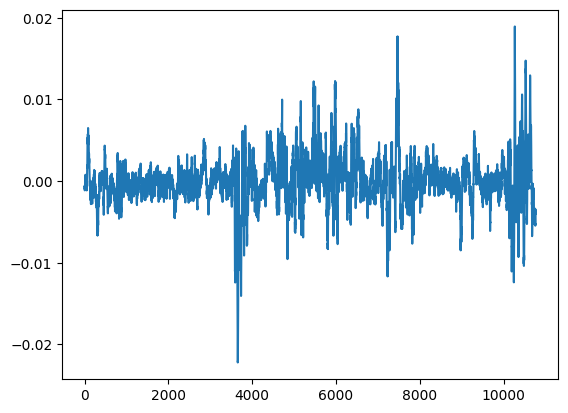

In [17]:
import matplotlib.pyplot as plt
plt.plot(J123 + J124 + J134)

In [8]:
import pandas as pd
import numpy as np

# Define cross-product operation
def cross_product(df_a, df_b):
    cross_product = np.cross(df_a.values, df_b.values)
    return pd.DataFrame(cross_product, columns=df_a.columns, index=df_a.index)

# Define dot-product operation
def dot_product(df_a, df_b):
    dot_product = np.einsum('ij,ij->i', df_a.values, df_b.values)
    return pd.Series(dot_product, index=df_a.index)

# Define main function to calculate current density using curlometer technique
def curlometer(spacecraft1, spacecraft2, spacecraft3, spacecraft4):

    # Define magnetic permeability constant
    mu0 = 4*np.pi*10**-7

    # Define vector and magnetic difference calculations
    def calculate_diff_vectors(s_i, s_j):

        r_ij = s_i[['sc_pos_xyz_gse__C1_CP_FGM_FULL1','sc_pos_xyz_gse__C1_CP_FGM_FULL2','sc_pos_xyz_gse__C1_CP_FGM_FULL3']] - \
               s_j[['sc_pos_xyz_gse__C1_CP_FGM_FULL1','sc_pos_xyz_gse__C1_CP_FGM_FULL2','sc_pos_xyz_gse__C1_CP_FGM_FULL3']]

        B_ij = s_i[['B_vec_xyz_gse__C1_CP_FGM_FULL1','B_vec_xyz_gse__C1_CP_FGM_FULL2','B_vec_xyz_gse__C1_CP_FGM_FULL3']] - \
               s_j[['B_vec_xyz_gse__C1_CP_FGM_FULL1','B_vec_xyz_gse__C1_CP_FGM_FULL2','B_vec_xyz_gse__C1_CP_FGM_FULL3']]

        return r_ij, B_ij 

    # Calculate vector and magnetic differences between each pair of satellites
    r12, B12 = calculate_diff_vectors(spacecraft1, spacecraft2)
    r13, B13 = calculate_diff_vectors(spacecraft1, spacecraft3)
    r14, B14 = calculate_diff_vectors(spacecraft1, spacecraft4)
    r23, B23 = calculate_diff_vectors(spacecraft2, spacecraft3)
    r24, B24 = calculate_diff_vectors(spacecraft2, spacecraft4)
    r34, B34 = calculate_diff_vectors(spacecraft3, spacecraft4)
    # Calculate the average current density for each surface of the tetrahedron
    J123 = (dot_product(B13, r23) - dot_product(B23, r13)) / dot_product(pd.Series(mu0), cross_product(r13, r23))
    J124 = (dot_product(B14, r24) - dot_product(B24, r14)) / dot_product(pd.Series(mu0), cross_product(r14, r24))
    J134 = (dot_product(B14, r34) - dot_product(B34, r14)) / dot_product(pd.Series(mu0), cross_product(r14, r34))
    J234 = (dot_product(B24, r34) - dot_product(B34, r24)) / dot_product(pd.Series(mu0), cross_product(r24, r34))

    # Calculate the average current density for the entire tetrahedron
    J_av = np.sum([J123, J124, J134, J234], axis=0) 

    return pd.DataFrame(J_av, columns=['Jav'])

curlometer(data_1, data_2, data_3, data_4)

ValueError: einstein sum subscripts string contains too many subscripts for operand 0

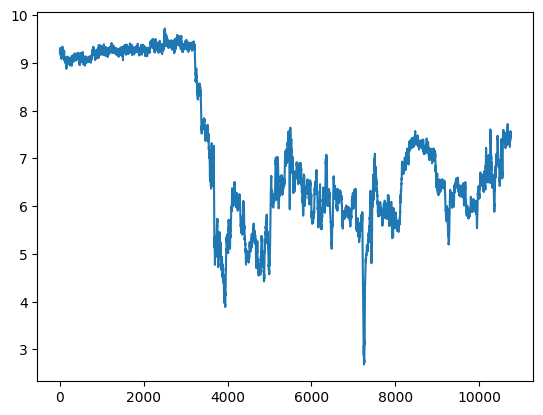

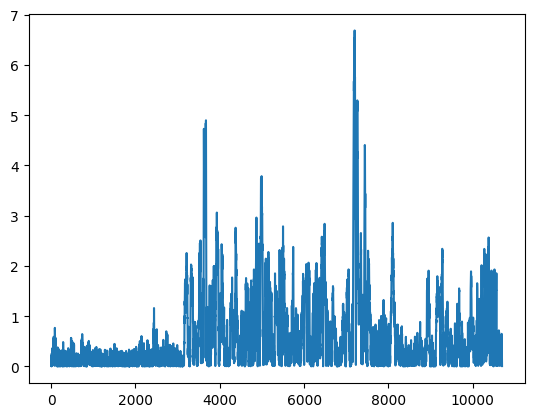

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def calculate_mod_B(df, Bx_column, By_column, Bz_column):
    """
    Function to calculate mod_B from the given pandas dataframe and column names.
    Args:
    df : pandas.DataFrame
    Bx_column, By_column, Bz_column : str

    Returns:
    pandas.Series
    """
    # Get the columns
    Bx = df[Bx_column]
    By = df[By_column]
    Bz = df[Bz_column]

    # Calculate the magnitude of B (mod_B)
    yy = np.sqrt(Bx**2 + By**2 + Bz**2)

    return yy

# Util function to plot the mod_B
def plot_mod_B(yy):
    plt.figure()
    plt.plot(yy)
    plt.show()


# Identify the columns
Bx_column = "B_vec_xyz_gse__C1_CP_FGM_FULL1"
By_column = "B_vec_xyz_gse__C1_CP_FGM_FULL2"
Bz_column = "B_vec_xyz_gse__C1_CP_FGM_FULL3"



# Calculate mod_B
yy = calculate_mod_B(data_1, Bx_column, By_column, Bz_column)

# Plot mod_B
plot_mod_B(yy)

# Save mod_B to a file
#yy.to_csv('mod_B.dat', sep='\t', header=False, index=False)

def calculate_PVI(x, tau=66):
    """
    Function to calculate PVI from the given pandas series
    Args:
    x : pandas.Series
    tau : int

    Returns:
    pandas.Series
    """
    
    # Ensure x is a pandas series
    if not isinstance(x, pd.Series):
        x = pd.Series(x)

    n = len(x)
    delta = []

    # Loop through to compute delta
    for i in range(0, n-tau):
        delta.append(x[i+tau] - x[i])

    delta = pd.Series(delta)

    # Compute absolute, square, mean, and root
    abs_delta = delta.abs()
    square_delta = abs_delta.pow(2)
    mean_delta = square_delta.mean()
    sqrt_delta = np.sqrt(mean_delta)

    # Compute PVI
    PVI = abs_delta.divide(sqrt_delta)

    # Transpose
    PVI = PVI.T

    return PVI

# Using matplotlib for plotting
def plot_data(PVI):
    plt.figure()
    plt.plot(PVI)
    plt.show()

# Usage

# Calculate PVI
PVI = calculate_PVI(yy)

# Plot the PVI
plot_data(PVI)



In [24]:
import numpy as np
import pandas as pd

def norm(vector):
    return np.sqrt(np.sum(np.square(vector)))

def dot(v1, v2):
    return np.dot(v1, v2)
    
def angle(v1, v2):
    v1_norm = norm(v1)
    v2_norm = norm(v2)
    
    v1 = v1 / v1_norm
    v2 = v2 / v2_norm
    
    dot_product = dot(v1, v2)
    
    return 180.0 * np.arccos(dot_product) / np.pi

def cs_detection(df, tau, theta_c):
    b1 = df.iloc[0:tau].values
    b2 = df.iloc[tau:2*tau].values
    
    ff_c = 0.15
    cont = 0
    for i in range(tau):
        theta = angle(b1[i], b2[i])
        if theta >= theta_c:
            cont +=1
    
    ff = float(cont)/float(tau)
    
    if ff >= ff_c:
        out = 1
    else:
        out = 0
    
    return out

def limethod(df, theta_c = 35.0, tau_sec = 10):
    
    # Calculate timesteps
    dt = 1.0 / 22.0
    tau = int(22 * tau_sec)
    
    outputs = []
    data_points = df.values
    for i in range(tau, len(data_points) - tau):
        window = df.iloc[i-tau+1 : i+tau+1]
        cs_out = cs_detection(window, tau, theta_c)
        outputs.append([df.index[i], cs_out])
        
    detected_df = pd.DataFrame(outputs, columns=['Time', 'cs_out'])
    
    return detected_df
detected = limethod(PVI)


In [27]:
detected[detected['cs_out'] != 0 ]

,Time,cs_out


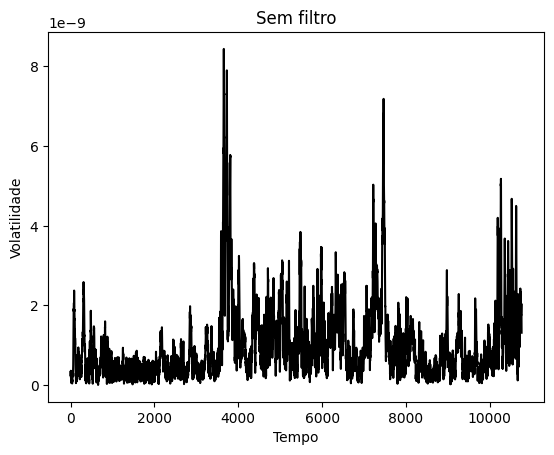

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        # Handle specific formatting issues if necessary
        return float(s.replace('D', 'E'))
current_density = np.loadtxt('utils/current_sheet/current_density.dat', converters={0: convert_to_float})
#x_coords = x_coords * 10e9  
#x_coords = x_coords * 10e9  
# Display the plot
plt.plot(current_density, color="black")
plt.xlabel('Tempo')
plt.ylabel('Volatilidade')

# Set the title of the plot
plt.title('Sem filtro')


plt.show()

,mag
0,9.265245
1,9.237192
2,9.242086
3,9.233788
4,9.194081
...,...
10757,7.493236
10758,7.497240
10759,7.466882
10760,7.444598


/tmp/ipykernel_274487/2166174636.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vol_mag'] = df['Delta_r_mag'].rolling(window=w).std()


<Axes: >

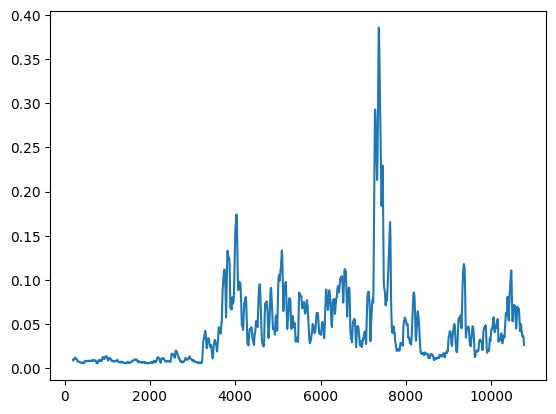

In [31]:

def calculate_magnetic_volatility(df, B, tau=50, w=50):
    """
    Calcular a volatilidade magnética.

    Parâmetros:
    df (pandas.DataFrame): DataFrame contendo os dados.
    B (str): Nome da coluna contendo o campo magnético.
    tau (int, opcional): Valor a ser usado para τ.
    w (int, opcional): Tamanho da janela para calcular a volatilidade magnética.

    Retorna:
    vol_mag (pandas.Series): Volatilidade magnética calculada.
    """
    
    # Calcular r_mag(t)
    #df['r_mag'] = np.log(df[B].abs())

    # Calcular Delta_r_mag(t)
    #df['Delta_r_mag'] = df['r_mag'].shift(periods=tau) - df['r_mag']

    df['Delta_r_mag'] = np.log(df[B].shift(periods=tau) / df[B])
    # Dropout do NaN produzidos pelo shiftment
    df = df.dropna()

    # Calcular vol_mag(t)
    df['vol_mag'] = df['Delta_r_mag'].rolling(window=w).std()
    
    return df['vol_mag']

volat = calculate_magnetic_volatility(pd.DataFrame(yy, columns=["mag"]), "mag", 100, 100)
volat.plot()

In [33]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

def apply_gaussian_kernel(x_coords, sigma):
    smoothed_x = gaussian_filter1d(x_coords, sigma)
    return smoothed_x

sigma = 50.0

#smoothed_curl = apply_gaussian_kernel(current_density, sigma)
smoothed_pvi = apply_gaussian_kernel(PVI, sigma)
smoothed_volat = apply_gaussian_kernel(volat, sigma)



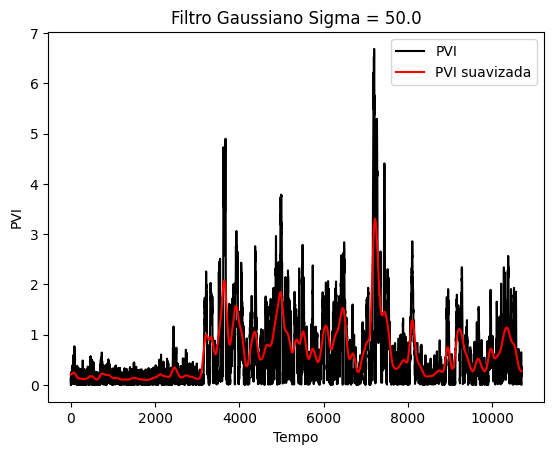

In [37]:

plt.plot(PVI, color="black", label="PVI")
plt.plot(smoothed_pvi, color="red", label="PVI suavizada")
plt.xlabel('Tempo')
plt.ylabel('PVI')
plt.legend()
# Set the title of the plot
plt.title('Filtro Gaussiano Sigma = 50.0')


plt.show()

In [ ]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(smoothed_curl, smoothed_volat)
print("Spearman correlation coefficient:", spearman_corr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Generate random data for demonstration
s1 = smoothed_curl
s2 = smoothed_pvi[:len(smoothed_curl)]
s3 = smoothed_volat

lags = range(-1000, 1000)  # List of lag values

correlation_s1_s2 = []
correlation_s1_s3 = []

# Calculate correlations for each lag
for lag in lags:
    if lag < 0:
        cor_s1_s2, _ = spearmanr(s1[:lag], s2[-lag:])
        cor_s1_s3, _ = spearmanr(s1[:lag], s3[-lag:])
    elif lag == 0:
        cor_s1_s2, _ = spearmanr(s1, s2)
        cor_s1_s3, _ = spearmanr(s1, s3)
    else:
        cor_s1_s2, _ = spearmanr(s1[lag:], s2[:-lag])
        cor_s1_s3, _ = spearmanr(s1[lag:], s3[:-lag])
    
    correlation_s1_s2.append(cor_s1_s2)
    correlation_s1_s3.append(cor_s1_s3)

# Plotting
plt.plot(lags, correlation_s1_s2, label="curl vs pvi")
plt.plot(lags, correlation_s1_s3, label="curl vs volat")
plt.title("Spearman Correlation between s1 and s2, s1 and s3 at Different Lags")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def declustering_function(data, u=30000, run=10):
    # Threshold and run are parameters for the function with default values
    # Compute the POT (Peaks Over Threshold)
    pot_df = data[data['value'] > u].copy()
    pot_df['index'] = pot_df.index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def declustering_function(data, u=30000, run=10):
    # Threshold and run are parameters for the function with default values
    # Compute the POT (Peaks Over Threshold)
    pot_df = data[data['value'] > u].copy()
    pot_df['index'] = pot_df.index

    # Compute the VBT (Values Below Threshold) - for completeness
    vbt_df = data[data['value'] < u].copy()

    # Create a new column 'cluster' in the POT data frame
    # A new cluster starts if the gap between the positions is larger than 'run'
    pot_df['cluster'] = (pot_df['index'] - pot_df['index'].shift() > run).cumsum()

    # Compute the declustered POT (maximum value in each cluster)
    decluster_df = pot_df.groupby('cluster')['value'].idxmax()
    declustered_pot = data.loc[decluster_df]

    # Plotting
    # separate the points into two groups using the threshold
    below_threshold = data[data['value'] < u]
    above_threshold = data[data['value'] >= u]

    # plot points below threshold in black
    plt.scatter(below_threshold.index, below_threshold['value'], color='black')
    
    # plot points above threshold in transparent gray
    plt.scatter(above_threshold.index, above_threshold['value'], color='gray', alpha=0.5)
    
    # plot declustered points in red
    plt.scatter(declustered_pot.index, declustered_pot['value'], color='red')
    
    # plot the threshold line
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = u * np.ones_like(x_vals)
    plt.plot(x_vals, y_vals, color='red', ls='--')
    plt.show()

    # Output
    print('Number of Clusters =:', declustered_pot.shape[0])
    return declustered_pot

    # A new cluster starts if the gap between the positions is larger than 'run'
    pot_df['cluster'] = (pot_df['index'] - pot_df['index'].shift() > run).cumsum()

    # Compute the declustered POT (maximum value in each cluster)
    decluster_df = pot_df.groupby('cluster')['value'].idxmax()
    declustered_pot = data.loc[decluster_df]

    # Plotting
    # separate the points into two groups using the threshold
    below_threshold = data[data['value'] < u]
    above_threshold = data[data['value'] >= u]

    # plot points below threshold in black
    plt.scatter(below_threshold.index, below_threshold['value'], color='black')
    
    # plot points above threshold in transparent gray
    plt.scatter(above_threshold.index, above_threshold['value'], color='gray', alpha=0.5)
    
    # plot declustered points in red
    plt.scatter(declustered_pot.index, declustered_pot['value'], color='red')
    
    # plot the threshold line
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = u * np.ones_like(x_vals)
    plt.plot(x_vals, y_vals, color='red', ls='--')
    plt.show()

    # Output
    print('Number of Clusters =:', declustered_pot.shape[0])
    return declustered_pot


In [ ]:
# Define the mean and standard deviation of excess
def stats_excess(data, threshold):
    # Extract values above the threshold
    excess = data[data > threshold]
    
    # Calculate the mean excess
    mean_excess = np.mean(excess - threshold)
    
    # Calculate the standard deviation of excess
    std_excess = np.std(excess - threshold)
    
    return mean_excess, std_excess

# Function to plot mean excess for multiple thresholds
def plot_mean_excess(data, min_thresh, max_thresh, num_threshs=100):
    # Create a numpy array of thresholds from min_thresh to max_thresh
    thresholds = np.linspace(min_thresh, max_thresh, num_threshs)
    
    # Calculate mean excess and its standard deviation for each threshold
    mean_excesses, std_excesses = zip(*[stats_excess(data, thresh) for thresh in thresholds])
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Draw the plot along with error bars
    ax.errorbar(thresholds, mean_excesses, yerr= std_excesses, fmt='o', label='Mean Excess')
    
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Mean Excess')
    ax.legend(loc='best')
    
    # Show the plot
    plt.show()

plot_mean_excess(upKings.diffPerc, min_thresh=0.000001, max_thresh=0.18)
from scipy.stats import genpareto

def fit_pot_model(data, min_threshold, max_threshold, num_thresholds):
    """
    This function fits a Peaks Over Threshold (POT) model to a range of thresholds.
    :param data: A pandas Series or DataFrame.
    :param min_threshold: The minimum threshold value.
    :param max_threshold: The maximum threshold value.
    :param num_thresholds: The number of thresholds.
    :return: A DataFrame with the fitted parameters of the POT model for each threshold.
    """
    results = []
    thresholds = np.linspace(min_threshold, max_threshold, num_thresholds)
    
    for threshold in thresholds:
        # Select data over the threshold
        exceedances = data[data > threshold] - threshold

        # Fit the Generalized Pareto Distribution (GPD) to the exceedances
        c, loc, scale = genpareto.fit(exceedances)

        results.append({
            'Threshold': threshold,
            'Shape': c,
            'Location': loc,
            'Scale': scale
        })

    return pd.DataFrame(results)
min_threshold = 0.004
max_threshold = 0.15
num_thresholds = 10

results = fit_pot_model(upKings.diffPerc, min_threshold, max_threshold, num_thresholds)

def plot_shape_parameter(results):
    """
    This function plots the 'Shape' parameter of the Peaks Over Threshold (POT) model.
    :param results: A DataFrame with the fitted parameters of the POT model for each threshold.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(results['Threshold'], results['Shape'], marker='o')
    plt.title('Evolution of Shape Parameter over Thresholds')
    plt.xlabel('Threshold')
    plt.ylabel('Shape Parameter')
    plt.grid(True)
    plt.show()

# Assume 'results' is the DataFrame returned by 'fit_pot_model'
# You may need to run `fit_pot_model` function prior to plot
plot_shape_parameter(results)
def plot_mean_residual_life(data, thresholds):
    plt.figure(figsize = (10, 5))
    means = []
    
    for threshold in thresholds:
        means.append(np.mean(data[data > threshold] - threshold))
        
    derivatives = np.gradient(means)
    derivatives_change_rate = np.abs(np.gradient(derivatives))

    approx_const_start_index = np.where(derivatives_change_rate < 0.01)[0][0]
    approx_const_start_threshold = thresholds[approx_const_start_index]

    plt.plot(thresholds, means, marker='o')
    plt.axvline(x=approx_const_start_threshold, color='r', linestyle='--')
    plt.text(approx_const_start_threshold, max(means)/2, f'Linear begin ~{approx_const_start_threshold}', color='r')
    
    plt.grid(True)
    plt.xlabel('Thresholds')
    plt.ylabel('Mean Excess')
    plt.title('Mean residual life plot')
    plt.show()

plot_mean_residual_life(upKings.diffPerc, np.linspace(min_threshold, max_threshold, num_thresholds))


In [ ]:
## DECLUSTERIZACAO
data = upKings # Assuming the data is a CSV file
data["value"] = data['diffPercInt']


u = 30000 # Threshold
run = 10 # Interval between two different clusters of POT

# Compute the POT (Peaks Over Threshold)
pot_df = data[data['value'] > u].copy()
pot_df['index'] = pot_df.index

# Compute the VBT (Values Below Threshold) - for completeness
vbt_df = data[data['value'] < u].copy()

# Create a new column 'cluster' in the POT data frame
# A new cluster starts if the gap between the positions is larger than 'run'
pot_df['cluster'] = (pot_df['index'] - pot_df['index'].shift() > run).cumsum()

# Compute the declustered POT (maximum value in each cluster)
decluster_df = pot_df.groupby('cluster')['value'].idxmax()
declustered_pot = data.loc[decluster_df]

# Output
print('Number of Clusters =:', declustered_pot.shape[0])


threshold = 0  # set your threshold here
upKings["Position"] = upKings.index
# separate the points into two groups using the threshold
below_threshold = upKings[upKings["diffPercInt"] < u]
above_threshold = upKings[upKings["diffPercInt"] >= u]

# plot points below threshold in black
plt.scatter(below_threshold["Position"], below_threshold["diffPercInt"], color='black')

# plot points above threshold in transparent gray
plt.scatter(above_threshold["Position"], above_threshold["diffPercInt"], color='gray', alpha=0.5)

# plot declustered points in red
plt.scatter(declustered_pot["Position"], declustered_pot["diffPercInt"], color='red')

# plot the threshold line
x_vals = np.array(plt.gca().get_xlim())
y_vals = u * np.ones_like(x_vals)
plt.plot(x_vals, y_vals, color='red', ls='--')

plt.show()

In [63]:
data_4[['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3']].values

array([[ 99807.4, -30630. ],
       [ 99807.4, -30630. ],
       [ 99807.3, -30630. ],
       ...,
       [ 99287.6, -31027.2],
       [ 99287.6, -31027.2],
       [ 99287.5, -31027.2]])

In [28]:
[data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values]

[array(['99738.7', '99738.6', '99738.6', ..., '99217.5', '99217.4',
        '99217.4'], dtype=object),
 array(['13721.3', '13721.3', '13721.3', ..., '13406.7', '13406.6',
        '13406.6'], dtype=object),
 array(['-30025.2', '-30025.2', '-30025.3', ..., '-30423.1', '-30423.1',
        '-30423.2'], dtype=object)]

In [40]:
delta_r_values = np.array([
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values]
])

delta_b_values = np.array([
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values]
])


In [49]:
delta_r = delta_r_values[:, :, i].astype(float)
delta_b = delta_b_values[:, :, i].astype(float)

densidade = []
# Processar os valores para cada ponto no tempo
for i in range(len(data_1)):
    
    rot_b = curlometer(delta_r, delta_b)
    current_density = estimate_current_density(delta_r, delta_b)
    
    print(f"Tempo: {data_1['time_tags__C1_CP_FGM_FULL1'].iloc[i]}")
    print("Rotacional do campo magnético:")
    print(rot_b)
    print("Densidade média da corrente:")
    print(current_density)
    densidade.append(current_density)
    print("---")


AxisError: axisa: axis -1 is out of bounds for array of dimension 0

In [1]:
import numpy as np

def curlometer(delta_r, delta_b):
    # Calcula o rotacional do campo magnético
    rot_b = np.cross(delta_r, delta_b) / np.linalg.norm(delta_r)**2
    
    return rot_b

def estimate_current_density(delta_r, delta_b):
    # Calcula a densidade da corrente média usando a lei de Ampère
    mu_0 = 4 * np.pi * 1e-7
    j = np.zeros(3)
    
    for i in range(3):
        for j in range(3):
            if i != j:
                j += mu_0 * np.dot(j, np.cross(delta_r[i], delta_r[j])) / (np.linalg.norm(delta_r[i])**2)
    
    return j

# Exemplo de uso
delta_r = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
delta_b = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])

rot_b = curlometer(delta_r, delta_b)
current_density = estimate_current_density(delta_r, delta_b)

print("Rotacional do campo magnético:")
print(rot_b)

print("Densidade média da corrente:")
print(current_density)


Rotacional do campo magnético:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Densidade média da corrente:
2
